In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

In [2]:
def flatten_and_mask_shots(shots, mask,):
    num_shots = shots.shape[0]
    size = shots.shape[1]*shots.shape[2]
    flat_mask = mask.reshape(size)
    flat_shots =  shots.reshape( (num_shots,size))*flat_mask
    
    return flat_shots[:,flat_mask]

def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

In [3]:
ave_int_dir = '/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/ave_int_statisitcs'
run = 71
f = h5py.File(os.path.join(ave_int_dir,'run%d_ave_int.h5'%run))
print f.keys()

f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run%d_masks.h5'%run,'r')
mask=f_mask['mask'].value

[u'ave_flat_shots', u'ave_flat_shots_err', u'bin_centers', u'bin_delta', u'num_shots_per_bin']


In [4]:
treshold = 50
shots = f['ave_flat_shots'].value
mean_int = shots.mean(-1)

n_shots = f['num_shots_per_bin'].value
select=n_shots>treshold

g_n = mean_int[select,None]/shots[select]
mean_int = mean_int[select]

shots=shots[select]
n_shots=n_shots[select]


In [25]:
n_shots[idx]

935

14.2388326778 0.978690198494


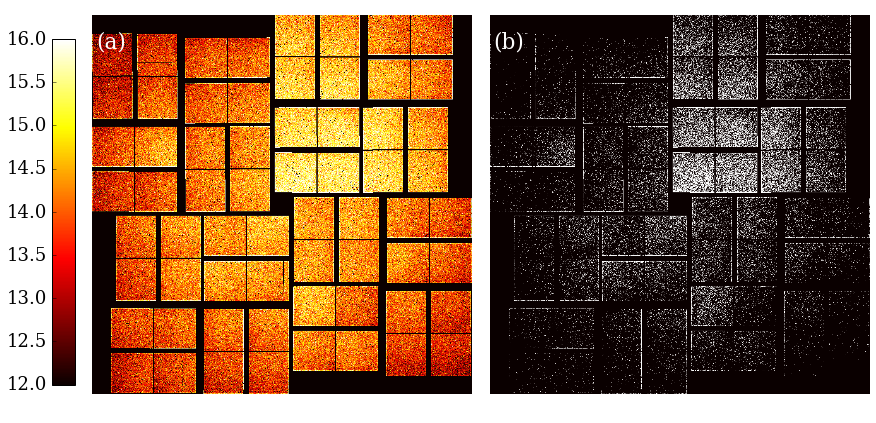

In [24]:
idx = 10

shot_to_plot=shots[idx]
mu=shot_to_plot.mean()
sigma=shot_to_plot.std()

gs = GridSpec(1,2)

fig = plt.figure(figsize=[16,8])
gs.update(wspace=0.05)
ax=plt.subplot(gs[0,0])
im=plt.imshow( unflatten_shots(shot_to_plot[None,:],mask)[0]*mask, 
         aspect=1, cmap='hot',vmin=12,vmax=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.09, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('left')

ax.set_title('(a)', x= 0.05,y =0.9, color='White')
ax.set_axis_off()

ax=plt.subplot(gs[0,1])
large_int_plot=shot_to_plot>(mu+sigma)
plt.imshow( unflatten_shots(large_int_plot[None,:],mask)[0]*mask, 
         aspect=1, cmap='hot',vmin=0,vmax=1)
ax.set_title('(b)', x= 0.05,y =0.9, color='White')

ax.set_axis_off()
print mu, sigma
# plt.colorbar()
# plt.savefig('copper_not_flat_aveADU_%.2f.png'%mean_int[idx],bbox_in_inches='tight')